<a href="https://colab.research.google.com/github/benduong2001/dsproject_font_decorator/blob/main/dsproject_font_decorator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition
import pandas as pd
import os
from PIL import Image
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = (7,7)

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


* Regular
* Futuristic
* Serif
* Cursive
* Gothic
#### Background ####
* Dataset of Images: Letters labelling do not matter
* Of Letters alone [handdrawn or computer?] [font type is labeled,or unsupervised pca]
* Of texture alone [texture type is labeled]
* Of Both? (in need of labeled?, or unsupervised mixed labelling if mixed styles synthesis if input font is ambiguous, plus training data). Thus UNET 
* Or was it font converter? not background?

In [3]:
#from keras.datasets import mnist
#(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
pixel_column_names = []
for i in range(0, 20):
    for j in range(0, 20):
        pixel_column_name = "r{0}c{1}".format(str(i),str(j))
        pixel_column_names.append(pixel_column_name)
        

In [5]:
font_folder_path = "/content/drive/MyDrive/dsprojects/dsproject_imagery/dsprojects_fonts/fonts/"

In [6]:
font_image_folder_path = "/content/drive/MyDrive/dsprojects/dsproject_imagery/dsprojects_fonts/uci_fonts_images/"

In [7]:
uci_font_family_csv_file_names = os.listdir(font_folder_path)

In [ ]:
failed_font_families = []
i = 10 # bookman
i = 0
#for i in range(len(uci_font_family_csv_file_names)):
uci_font_family_csv_file_name = uci_font_family_csv_file_names[i]
uci_font_family = uci_font_family_csv_file_name.split(".csv")[0]
#print(uci_font_family)
uci_font_family_csv_file_path = font_folder_path + uci_font_family_csv_file_name
temp_uci_font_family_df_orig = pd.read_csv(uci_font_family_csv_file_path)
try:
    temp_uci_font_family_df_pixels = temp_uci_font_family_df_orig[pixel_column_names]
    temp_uci_font_family_df_pixels_2d_arrays = temp_uci_font_family_df_pixels.values.reshape((temp_uci_font_family_df_pixels.shape[0], 20,20))
    for row_i in range(len(temp_uci_font_family_df_pixels_2d_arrays)):
        temp_img = Image.fromarray(temp_uci_font_family_df_pixels_2d_arrays[row_i].astype(np.uint8))
        temp_img.save(font_image_folder_path+"{0}_row{1}.jpg".format(uci_font_family, str(row_i)))
except Exception as e:
    print(str(e))
    failed_font_families.append(uci_font_family)
    pass

[Errno 2] No such file or directory: '/content/drive/MyDrive/dsprojects/dsproject_imagery/dsprojects_fonts/uci_fonts_images/AGENCY_row0.jpg'


In [8]:
i = 10 # bookman
i = 8
#for i in range(len(uci_font_family_csv_file_names)):
uci_font_family_csv_file_name = uci_font_family_csv_file_names[i]
uci_font_family = uci_font_family_csv_file_name.split(".csv")[0]
print(uci_font_family)
uci_font_family_csv_file_path = font_folder_path + uci_font_family_csv_file_name
temp_uci_font_family_df_orig = pd.read_csv(uci_font_family_csv_file_path)

BOOKMAN


In [9]:
#temp_uci_font_family_df_orig.iloc[0:94,]["m_label"].values
# numbers
# capital letters
# lowercase letters
# others
m_labels_all = list(range(33,126+1))
m_labels_alphanum_alpha_upper = list(range(m_labels_all[32], m_labels_all[32+26]))
m_labels_alphanum_alpha_lower = list(range(m_labels_all[64], m_labels_all[64+26]))
m_labels_alphanum_num = list(range(m_labels_all[16], m_labels_all[16+10]))


In [10]:
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.sort_values("m_label")#.value_counts()

In [11]:
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["m_label"].isin(m_labels_alphanum_alpha_upper)]

In [12]:
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["strength"] <= 0.5]
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["italic"] <= 0.5]

In [13]:
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.drop_duplicates(subset=["m_label","strength","italic"])

In [14]:
temp_uci_font_family_df_pixels = temp_uci_font_family_df_orig[pixel_column_names]

In [15]:
temp_uci_font_family_df_pixels_2d_arrays = temp_uci_font_family_df_pixels.values.reshape((temp_uci_font_family_df_pixels.shape[0], 20,20))

IndexError: ignored

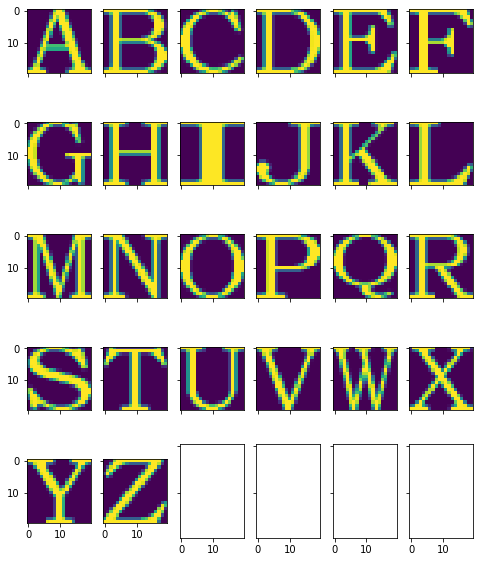

In [16]:
display_row_n = 5
display_row_m = 6
fig, axes = plt.subplots(display_row_n,display_row_m,sharex=True,sharey=True,figsize=(8,10))
N = display_row_n * display_row_m
for i in range((N)):
    img_i = temp_uci_font_family_df_pixels_2d_arrays[i]
    axes[i//display_row_m][(i-((i//display_row_m))*display_row_m)].imshow(img_i)
plt.show()

In [17]:
#display_row_n = 12
#display_row_m = 10
#fig, axes = plt.subplots(display_row_n,display_row_m,sharex=True,sharey=True,figsize=(21,20))
#N = display_row_n * display_row_m
#16
#32
#64
#for i in range(15,15+10):
#    img_i = temp_uci_font_family_df_pixels_2d_arrays[i]
#    axes[i//display_row_m][(i-((i//display_row_m))*display_row_m)].imshow(img_i)
#plt.show()

In [18]:
#26+26+10+31 (including underscore)
#`~!@$%^&*()-_+=[]\{}'":;,<.>/?"
#plt.imshow(temp_uci_font_family_df_pixels_2d_arrays[93]) the last tilde

In [19]:
#plt.imshow(temp_uci_font_family_df_pixels_2d_arrays[93])

In [20]:
# intersect all table's sets of m_labels. 
# scribe, gothic, futristic, serif, sans-serif, cursive, (unsupervised). 
# Try this out for 1 letter... or concatenate it! # concat the letters and numbers together. 
# 20*20*94 at most
# but maybe restrict to capital letters only. why? Equally dimensioned, other characters suffer from the stretching. sometimes lowercase characters are redundant. 

In [ ]:
unraveled_unsupervised = []
failed_font_families = []
i = 10 # bookman
i = 8
#for i in range(len(uci_font_family_csv_file_names)):
uci_font_family_csv_file_name = uci_font_family_csv_file_names[i]
uci_font_family = uci_font_family_csv_file_name.split(".csv")[0]
print(uci_font_family)
uci_font_family_csv_file_path = font_folder_path + uci_font_family_csv_file_name
temp_uci_font_family_df_orig = pd.read_csv(uci_font_family_csv_file_path)
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.sort_values("m_label")#.value_counts()
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["m_label"].isin(m_labels_alphanum_alpha_upper)]
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["strength"] <= 0.5]
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["italic"] <= 0.5]
temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.drop_duplicates(subset=["m_label","strength","italic"])
assert temp_uci_font_family_df_orig.shape[0] == 26
temp_uci_font_family_df_pixels = temp_uci_font_family_df_orig[pixel_column_names]
temp_uci_font_family_char_concat = temp_uci_font_family_df_pixels.values.reshape((20*20*26,))
temp_uci_font_family_char_concat
#unraveled_unsupervised.append(temp_uci_font_family_char_concat)

BANKGOTHIC


array([  1,   1,   1, ..., 255, 255, 255])

In [21]:
unraveled_unsupervised = []
passed_font_families = []
failed_font_families = []
i = 10 # bookman
i = 8
#for i in range(len(uci_font_family_csv_file_names)):
for i in range(len(uci_font_family_csv_file_names)):
    uci_font_family_csv_file_name = uci_font_family_csv_file_names[i]
    uci_font_family = uci_font_family_csv_file_name.split(".csv")[0]
    print(uci_font_family)
    uci_font_family_csv_file_path = font_folder_path + uci_font_family_csv_file_name
    temp_uci_font_family_df_orig = pd.read_csv(uci_font_family_csv_file_path)
    temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.sort_values("m_label")#.value_counts()
    temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["m_label"].isin(m_labels_alphanum_alpha_upper)]
    temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["strength"] <= 0.5]
    temp_uci_font_family_df_orig = temp_uci_font_family_df_orig[temp_uci_font_family_df_orig["italic"] <= 0.5]
    temp_uci_font_family_df_orig = temp_uci_font_family_df_orig.drop_duplicates(subset=["m_label","strength","italic"])
    try:
        assert temp_uci_font_family_df_orig.shape[0] == 26
        temp_uci_font_family_df_pixels = temp_uci_font_family_df_orig[pixel_column_names]
        temp_uci_font_family_char_concat = temp_uci_font_family_df_pixels.values.reshape((20*20*26,))
        unraveled_unsupervised.append(temp_uci_font_family_char_concat)
        passed_font_families.append(uci_font_family)
    except Exception as e:
        print(e)
        failed_font_families.append(uci_font_family)
        pass

ARIAL
AGENCY
BODONI
BAUHAUS
BERNARD
BRITANNIC
BOOK
BERLIN
BOOKMAN
BAITI
BLACKADDER
BITSTREAMVERA
BANKGOTHIC
BELL
BRADLEY
BASKERVILLE
BUXTON
CAARD
BROADWAY
CALIBRI
BRUSH
CAMBRIA
CALISTO
CENTURY
CANDARA
CALIFORNIAN
CENTAUR
CASTELLAR
CHILLER
CITYBLUEPRINT
CONSOLAS
CONSTANTIA
COMMERCIALSCRIPT
COMIC
COMPLEX
CORBEL
COURIER
COPPERPLATE
COUNTRYBLUEPRINT
COOPER
CREDITCARD

EBRIMA
EUROROMAN
ENGLISH
E13B

ERAS
ENGRAVERS
EDWARDIAN
FOOTLIGHT
FELIX TITLING
DUTCH801
CURLZ
ELEPHANT
GADUGI
FRENCH
GABRIOLA
FREESTYLE
FORTE
FRANKLIN
GIGI
GOTHICE
GEORGIA
HAETTENSCHWEILER
GILL
GARAMOND
GOUDY
GUNPLAY
GLOUCESTER
ISOC
HARLOW
HIGH TOWER
IMPACT
INFORMAL
ITALIC
HANDPRINT

HARRINGTON
IMPRINT
HIMALAYA
MATURA
LUCIDA
LEELAWADEE
MAIANDRA
KRISTEN
MAGNETO
KUNSTLER
JUICE
JOKERMAN
JAVANESE
MISTRAL
NIAGARA
MONOSPAC821
MONOTYPE
MONEY

MYANMAR
MONOTXT
MODERN
NINA
MINGLIU
MV_BOLI
NIRMALA
NUMERICS

OCRA
PALACE
PALATINO
ONYX
OCRB
PANROMAN
PHAGSPA
RAVIE
ROCKWELL
PLAYBILL
RICHARD
PAPYRUS
PROXY
PRISTINA
PERPETUA
PMINGLIU-EXTB
REFE

In [22]:
failed_font_families

['CREDITCARD', 'E13B', 'HANDPRINT', 'MONEY', 'NUMERICS', 'VIN']

In [23]:
eig_fonts_x = np.array(unraveled_unsupervised)#.shape

In [24]:
# BEGIN SOLUTION
C = np.cov(eig_fonts_x.T)

In [25]:
eigvals, eigvecs = np.linalg.eigh(C)

In [30]:
n = 50
top_n_eigfonts_eigvecs = eigvecs[:, -n:]

In [31]:
#top_n_eigfonts_eigvecs
PATH_FOLDER = "/content/drive/MyDrive/dsprojects/dsproject_imagery/dsprojects_fonts/"
top_n_eigfonts_eigvecs_stored_file_path = PATH_FOLDER + "/top_n_eigfonts_eigvecs.npy"
with open(top_n_eigfonts_eigvecs_stored_file_path, 'wb') as f:
    np.save(f, top_n_eigfonts_eigvecs)
    f.close()

In [ ]:
# SKIP TO HERE 

top_n_eigfonts_eigvecs_stored_file_path = PATH_FOLDER + "/top_n_eigfonts_eigvecs.npy"

with open(top_n_eigfonts_eigvecs_stored_file_path, 'rb') as f:
    a = np.load(f)
    f.close()
# assert (a==top_n_eigfonts_eigvecs).all()
eigvecs = a

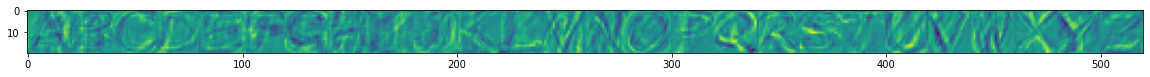

In [38]:
u = eigvecs[:, -50]
fig_temp, ax_temp = plt.subplots(figsize=(20,20))
#temp_letter= eig_fonts_x[0].reshape(26,20,20)[0]
temp_font_unraveled = u #eig_fonts_x[0]
temp_font = np.hstack(temp_font_unraveled.reshape(26,20,20))#.shape
plt.imshow(temp_font)
#np.hstack(eig_fonts_x[0].reshape(26,20,20)).shape

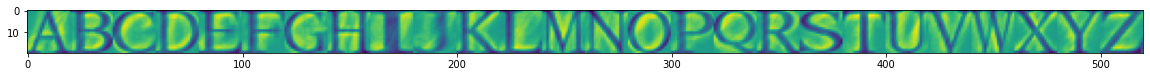

In [39]:
u = eigvecs[:, -3]
fig_temp, ax_temp = plt.subplots(figsize=(20,20))
#temp_letter= eig_fonts_x[0].reshape(26,20,20)[0]
temp_font_unraveled = u #eig_fonts_x[0]
temp_font = np.hstack(temp_font_unraveled.reshape(26,20,20))#.shape
plt.imshow(temp_font)
#np.hstack(eig_fonts_x[0].reshape(26,20,20)).shape

In [82]:
font_i =12

BELL


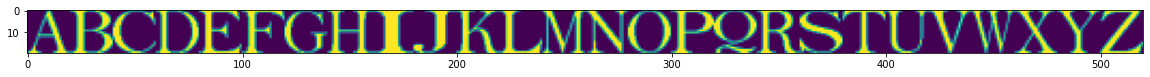

In [83]:
fig_temp, ax_temp = plt.subplots(figsize=(20,20))
font_i+=1
temp_font_unraveled = eig_fonts_x[font_i]
print(passed_font_families[font_i])
temp_font = np.hstack(temp_font_unraveled.reshape(26,20,20))#.shape
plt.imshow(temp_font)
#np.hstack(eig_fonts_x[0].reshape(26,20,20)).shape

In [42]:
eig_fonts_cosine_similarity = np.abs(normalize(eig_fonts_x,axis=1) @ normalize(eigvecs,axis=1))

In [45]:
eigfont_column_names = ["eigfont{0}".format(i+1) for i in range(50)]

cosine_similarity_df_eigfont_temp = pd.DataFrame(eig_fonts_cosine_similarity, columns = ["eigfont{0}".format(i+1) for i in range(50)])
cosine_similarity_df_eigfont_temp["font"] = passed_font_families


In [47]:
cosine_similarity_df_eigfont_temp

eigfont1  eigfont2  eigfont3  eigfont4  eigfont5  eigfont6  eigfont7  \
0    0.149247  0.850043  0.419754  0.362732  0.276916  0.846610  0.299138   
1    0.284710  0.398892  0.987501  0.191811  0.159232  0.467857  1.367168   
2    0.297865  1.080287  0.257899  1.185083  0.981967  0.068334  0.429774   
3    1.148488  0.449306  0.997923  0.282431  0.463784  0.876324  0.519404   
4    0.512328  0.073467  0.803502  0.203451  0.381558  0.358829  0.123273   
..        ...       ...       ...       ...       ...       ...       ...   
142  0.329332  0.037547  0.032203  0.982533  0.259293  0.308007  0.761545   
143  0.425004  0.577869  0.174029  0.074155  0.064481  0.433357  0.136986   
144  0.090117  0.479932  0.045122  0.252125  0.633682  0.309537  0.316578   
145  2.076250  0.084684  0.417718  0.226622  0.649784  0.981394  0.719466   
146  0.492774  0.461481  0.386011  0.105246  0.055310  0.063776  0.045179   

     eigfont8  eigfont9  eigfont10  ...  eigfont42  eigfont43  eigfont44  \
0    0.152125  1.601869   0.557036  ...   0.251357   0.861250   1.008244   
1    0.416960  0.591387   0.266856  ...   0.789044   0.744918   2.880215   
2    1.072194  0.085036   0.419922  ...   0.950545   2.019485   0.674802   
3    1.554510  0.147683   1.420901  ...   0.797583   1.988684   1.577556   
4    0.181905  0.790084   0.196153  ...   0.355461   0.707608   0.371557   
..        ...       ...        ...  ...        ...        ...        ...   
142  0.637948  0.991239   1.471660  ...   1.100779   1.516522   0.279510   
143  0.398820  0.110308   0.061820  ...   0.383094   0.355747   0.376519   
144  0.024729  0.393769   0.063104  ...   2.338708   0.360926   2.252856   
145  0.078487  0.737868   0.560835  ...   1.756936   0.956039   3.738118   
146  0.327168  0.165637   0.219441  ...   1.250222   0.471343   0.270090   

     eigfont45  eigfont46  eigfont47  eigfont48  eigfont49  eigfont50  \
0     1.779888   0.031363   1.796061   2.346098   1.805101  11.491154   
1     0.561945   0.468904   0.813832   3.742491   3.672480  10.848170   
2     1.105695   0.601539   1.823181   4.294595   4.381325  10.133070   
3     1.205425   0.153112   0.522902   0.821424   0.954436  12.498168   
4     0.341269   1.963385   0.784418   0.945665   3.523738  12.227744   
..         ...        ...        ...        ...        ...        ...   
142   2.457060   0.778306   0.363171   0.086110   3.187167  11.867705   
143   0.956498   1.526288   1.843179   4.459584   4.860690  11.219483   
144   1.608480   0.570248   2.858921   3.029915   6.770383   9.047091   
145   0.081813   1.860198   2.107182   3.340530   1.041358   5.649012   
146   1.861783   1.255056   0.065781   1.395028   4.356434  11.667679   

         font  
0       ARIAL  
1      AGENCY  
2      BODONI  
3     BAUHAUS  
4     BERNARD  
..        ...  
142    VINETA  
143   VERDANA  
144  YI BAITI  
145  VLADIMIR  
146      WIDE  

[147 rows x 51 columns]

In [74]:
import sklearn.neighbors
import sklearn.manifold

In [72]:
# eig_fonts_x.shape # is (147, 10400)
eig_fonts_x_normalized = normalize(eig_fonts_x, axis=1) #
#eig_fonts_cov = np.cov(eig_fonts_x_normalized) # 
eig_fonts_similarity_matrix = eig_fonts_x_normalized @ eig_fonts_x_normalized.T
W = eig_fonts_similarity_matrix

embedding = sklearn.manifold.spectral_embedding(W, n_components=2)

# embedding.shape
x = embedding[:,0]
y = embedding[:,1]
n = cosine_similarity_df_eigfont_temp["font"]
            
fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

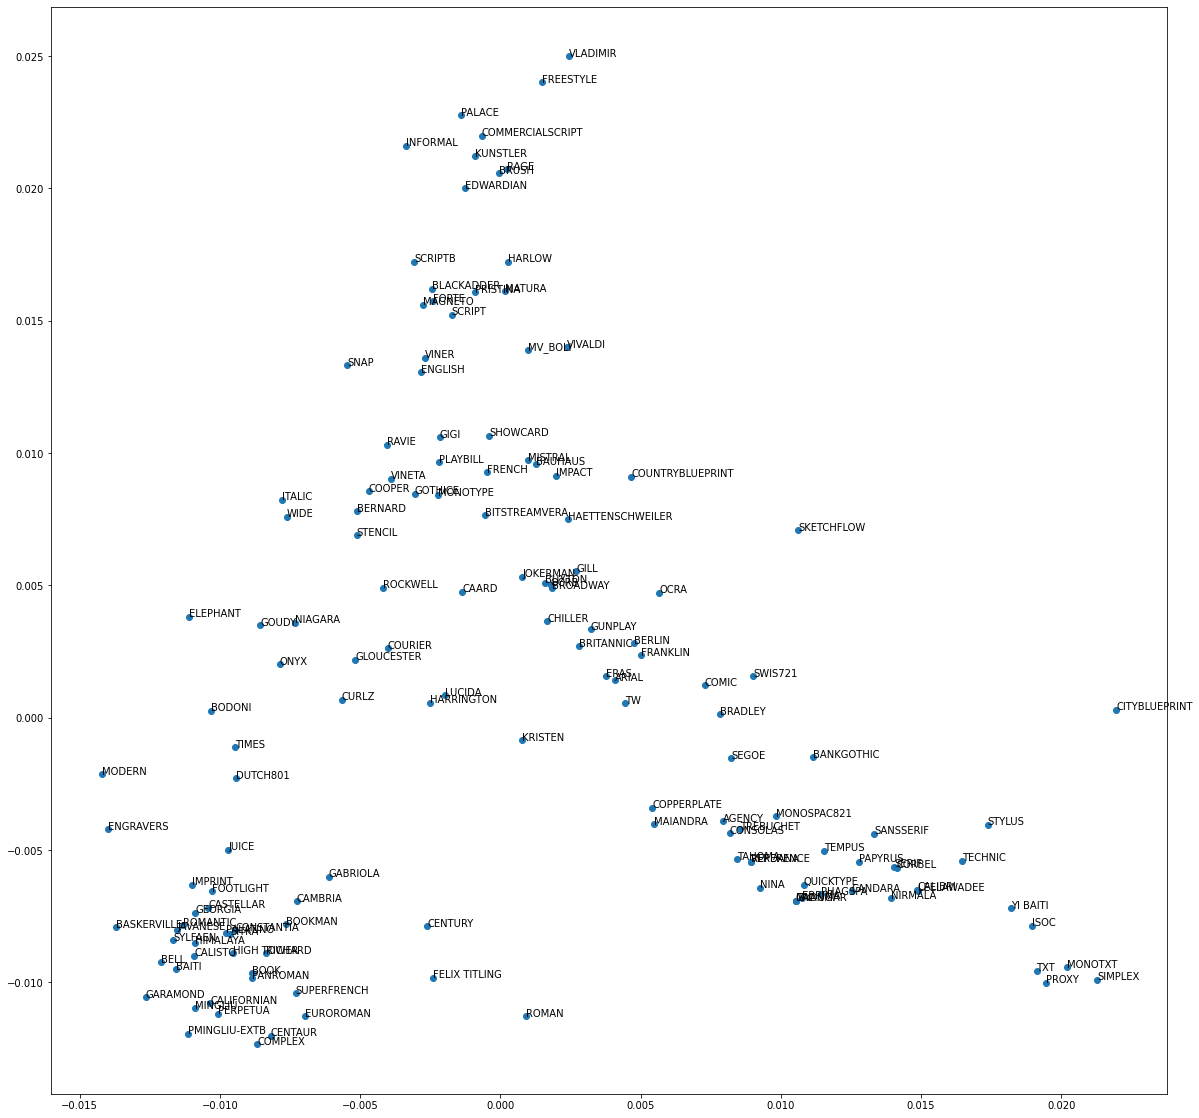

SCRIPT


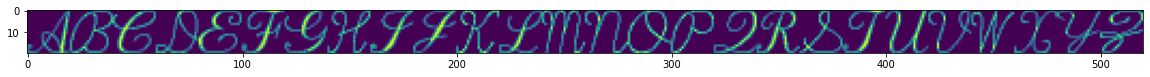

In [85]:
GIVEN_FONT_NAME = "SCRIPT"
FONT_FAMILIES = list(cosine_similarity_df_eigfont_temp["font"].values)
fig_temp, ax_temp = plt.subplots(figsize=(20,20))
font_i= FONT_FAMILIES.index(GIVEN_FONT_NAME)
temp_font_unraveled = eig_fonts_x[font_i]
print(passed_font_families[font_i])
temp_font = np.hstack(temp_font_unraveled.reshape(26,20,20))#.shape
plt.imshow(temp_font)
#np.hstack(eig_fonts_x[0].reshape(26,20,20)).shape

* Concatenated capital letters unsupervised class-labeling: [eigendecomposition,  unsupervised clustering, spectral embedding]
* Convolutional Neural Network on Individual Letters, capturing feature-maps like vertical lines = thick, etc.
    * Deterministically mono-labeled 
    * Indecisively multi-labeled (using those clusters or eigenfont)
* Texture:
    * deterministic papyrus word doc
    * raw imageset of fonts ON texture
        * in need of unet (or general text finder lik opencv)
        * indecisive texture style mix, 
        * first, independently multi-label classify the typeface using featuremaps from other CNN
        * ^ but also concat the texture's feature map (if not enough, infer from typeface), then do clustering (in the future, texture synthesis)
        * bonus: nature of the word itself being written, through nltk, 
* Dataset for raw texture:
    * consistent image backgrounds 
        * cursive, scribe = (cursive letters, manuscripts)
        * serif = (newspapers)
        * 
* Important things to note:
    * Deciding if the input texture needs to be extended (serif'd, bolded, etc). MNIST
    * Or the input text SHOULD NOT be regenerated, only the background: 
    * texture synthesis (not just deterministic choosing), depending on typeface's multi-label. Or Maybe the text's NLP nature

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

url = "https://mha.mun.ca/mha/cw/images/margins/scanned_letters/second-letter001.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/f/f5/Spencerian_example.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
np.array(img)

array([[[241, 232, 217],
        [241, 228, 219],
        [245, 230, 225],
        ...,
        [216, 197, 190],
        [208, 189, 182],
        [201, 182, 175]],

       [[239, 231, 218],
        [241, 228, 219],
        [246, 231, 226],
        ...,
        [216, 199, 191],
        [209, 192, 184],
        [203, 186, 178]],

       [[237, 230, 214],
        [240, 228, 216],
        [243, 228, 221],
        ...,
        [219, 207, 195],
        [217, 205, 193],
        [215, 203, 191]],

       ...,

       [[221, 227, 225],
        [213, 220, 213],
        [214, 219, 212],
        ...,
        [205, 198, 172],
        [206, 199, 173],
        [206, 199, 173]],

       [[116, 126, 125],
        [ 88,  99,  91],
        [ 78,  88,  77],
        ...,
        [205, 199, 173],
        [200, 194, 168],
        [196, 190, 164]],

       [[134, 151, 159],
        [109, 127, 129],
        [ 96, 114, 114],
        ...,
        [202, 199, 180],
        [196, 193, 174],
        [193, 191, 170]]

In [ ]:
(np.array(img)<(255*0.2)).mean()

0.0047381520345269774

In [ ]:
mask = np.where(np.array(img)<(255*0.2))

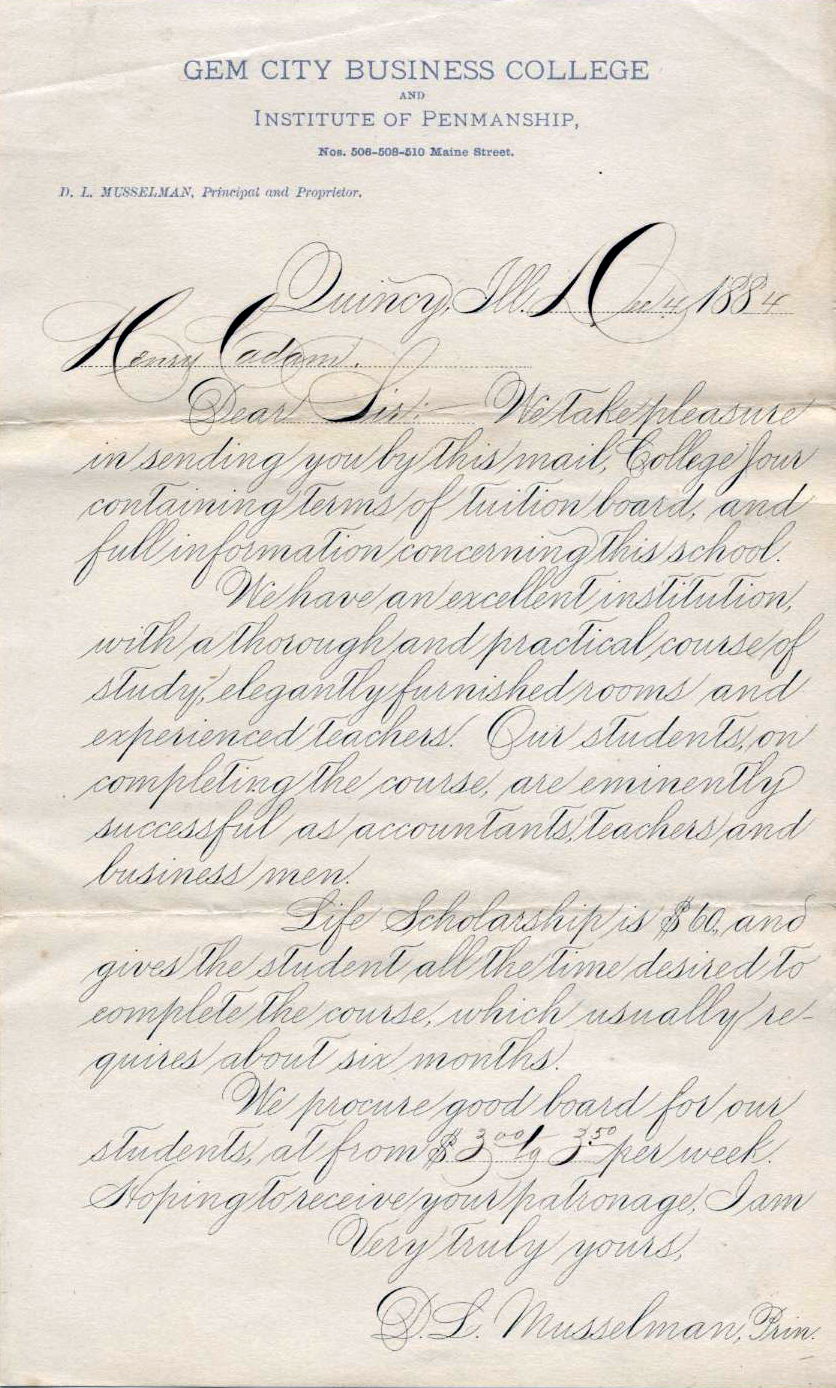

In [ ]:
img_arr = (np.array(img))
img_arr[mask[0]] *= 1
Image.fromarray(img_arr)

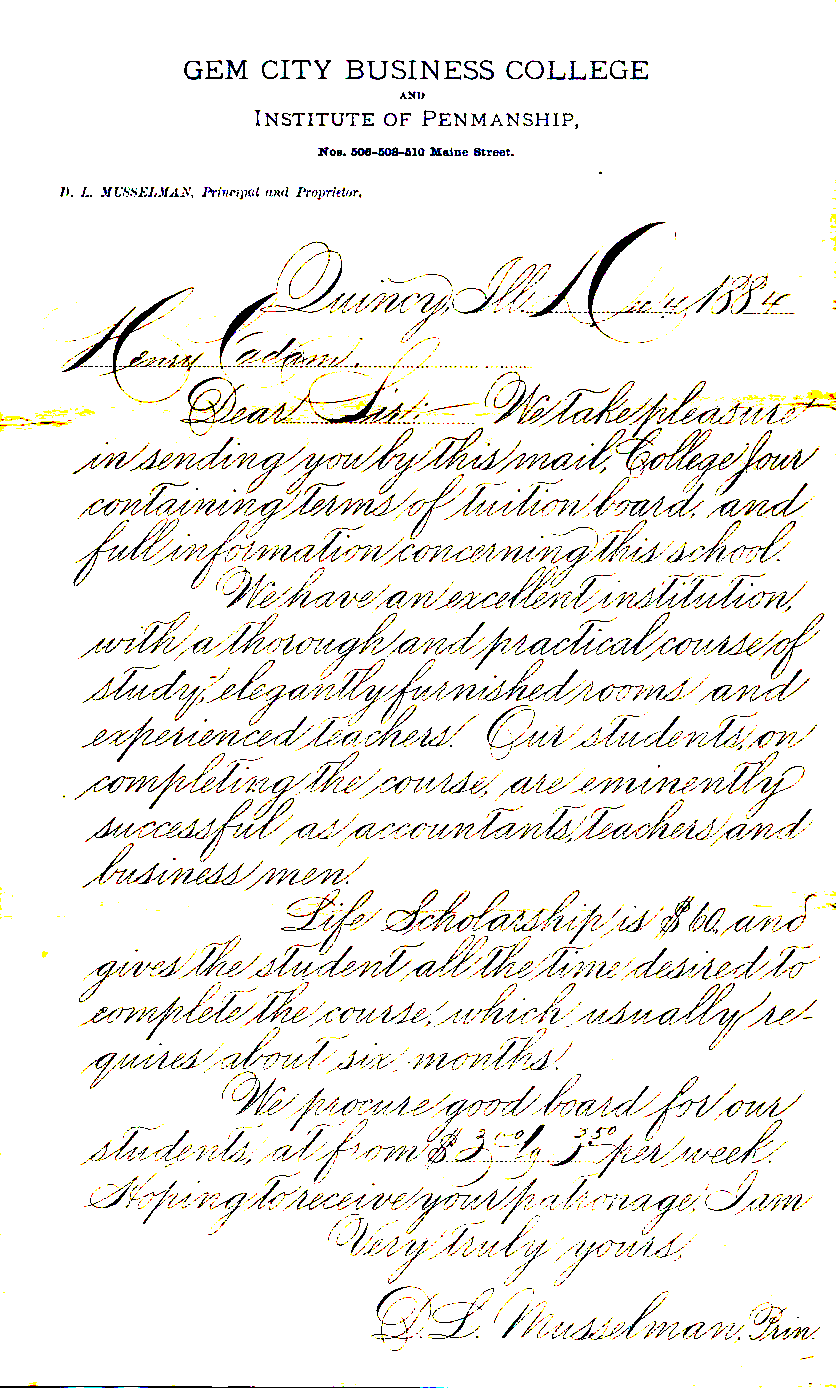

In [ ]:
mask_displayed = ((1-(np.array(img)<(255*0.7)))*255).astype(np.uint8)
Image.fromarray(mask_displayed)

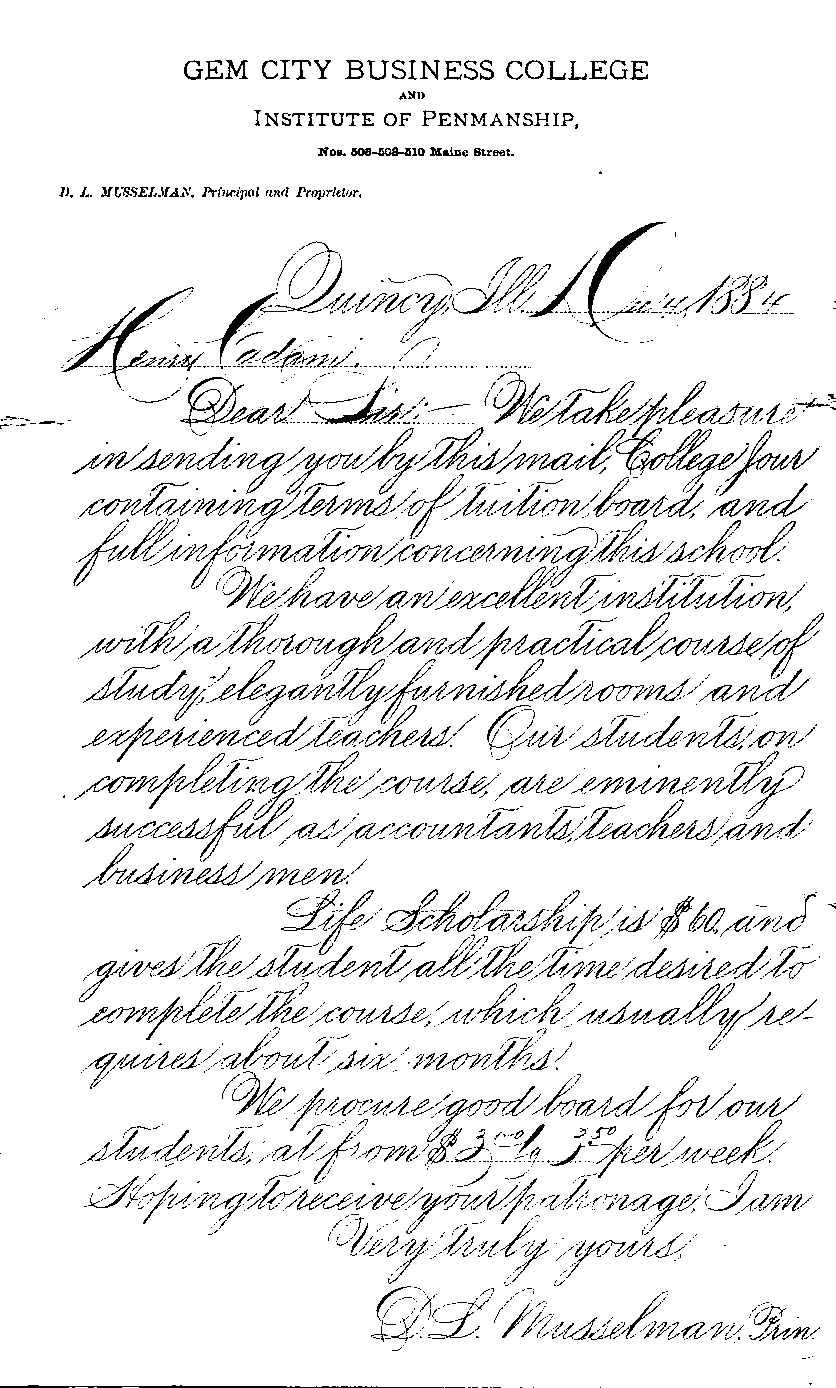

In [ ]:
Image.fromarray(
    (
    (1 - (np.all(np.array(img)<(255*0.75),axis=2))
)*255).astype(np.uint8)
    
)

In [ ]:
mask

(array([ 172,  172,  172, ..., 1337, 1337, 1338]),
 array([600, 600, 600, ..., 582, 582, 580]),
 array([0, 1, 2, ..., 1, 2, 2]))

In [ ]:
np.array(img)[mask]

array([50, 44, 22, ..., 49, 34, 35], dtype=uint8)

In [ ]:
np.array([229., 224., 204.])


array([229., 224., 204.])

In [ ]:
def get_dominant_color(pil_img):
    img = pil_img.copy()
    img = img.resize((1, 1), resample=0)
    dominant_color = img.getpixel((0, 0))
    return dominant_color
np.array(get_dominant_color(img))

(230, 230, 222)

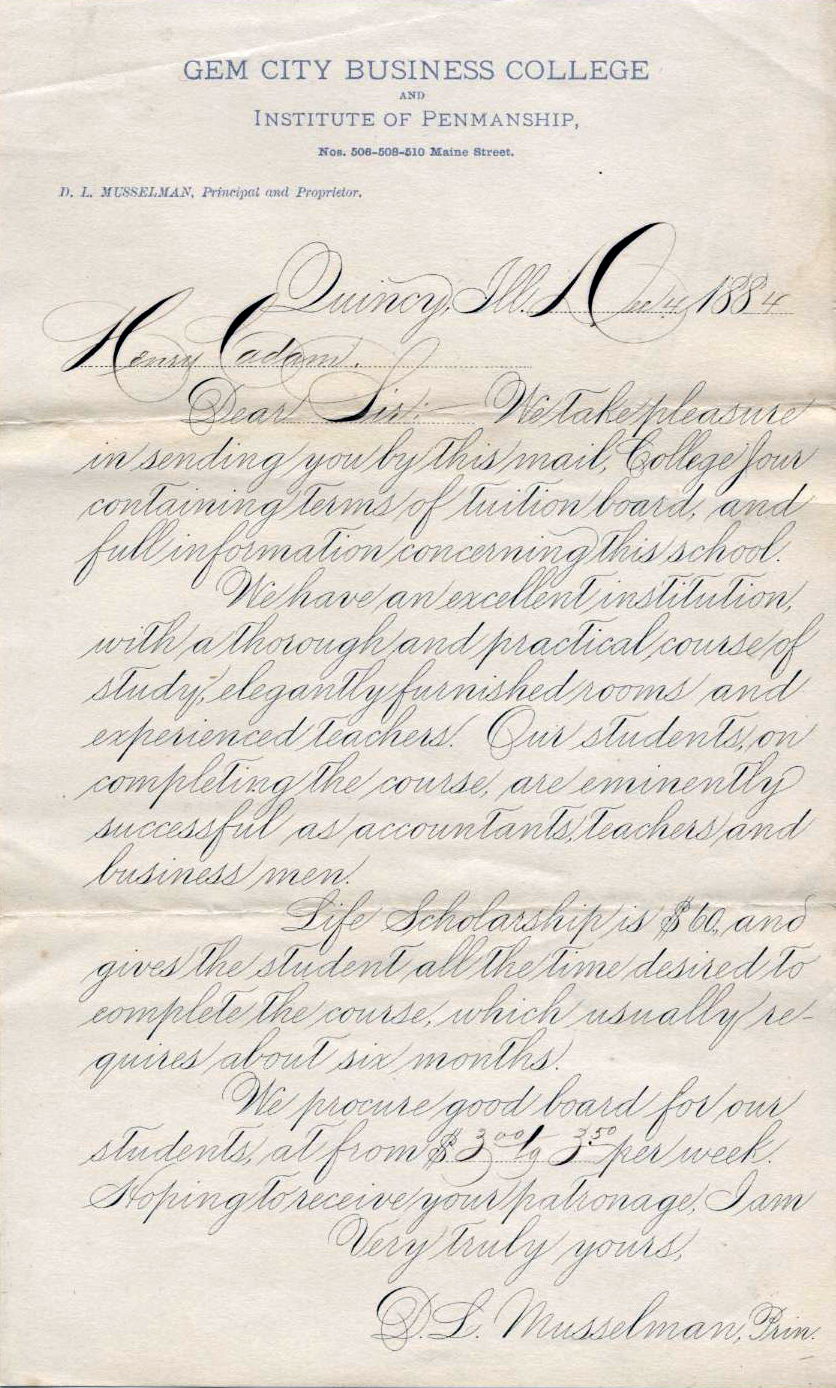

In [ ]:
img

In [ ]:
new_img_arr = np.array(img)
new_img_arr[mask[0],mask[1],mask[2]]

array([50, 44, 22, ..., 49, 34, 35], dtype=uint8)